In [4]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#yfinance
import yfinance as yf

In [5]:
# Set the stock ticker and timeframe
stock_ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-05-03'

# Fetch the historical stock data from Yahoo Finance
df = yf.download(stock_ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [89]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [92]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [94]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2010-01-04,-0.020714,0.075714
2010-01-05,0.007857,0.083572
2010-01-06,0.121786,0.160000
2010-01-07,0.041786,0.105358
2010-01-08,-0.060000,0.105000


In [95]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([1, 0, 0, ..., 0, 1, 0])

In [96]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [97]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [98]:
df['Predicted_Signal'] = cls.predict(X)


In [99]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


In [100]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [101]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600,-0.020714,0.075714,1,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800,0.007857,0.083572,1,0.001729,0.001729,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,0.121786,0.160000,1,-0.015906,-0.015906,-0.014177
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200,0.041786,0.105358,1,-0.001849,-0.001849,-0.016026
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800,-0.060000,0.105000,1,0.006648,0.006648,-0.009378
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.855881,95623200,5.449997,5.619995,1,-0.037328,-0.037328,3.509238
2022-04-27,155.910004,159.789993,155.380005,156.570007,155.627274,88063200,-0.660004,4.409988,1,-0.001467,-0.001467,3.507771
2022-04-28,159.250000,164.520004,158.929993,163.639999,162.654678,130216800,-4.389999,5.590012,1,0.045155,0.045155,3.552927


In [102]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600,-0.020714,0.075714,1,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800,0.007857,0.083572,1,0.001729,0.001729,0.001729,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,0.121786,0.160000,1,-0.015906,-0.015906,-0.014177,-0.014177
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200,0.041786,0.105358,1,-0.001849,-0.001849,-0.016026,-0.016026
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800,-0.060000,0.105000,1,0.006648,0.006648,-0.009378,-0.009378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.855881,95623200,5.449997,5.619995,1,-0.037328,-0.037328,3.509238,3.724327
2022-04-27,155.910004,159.789993,155.380005,156.570007,155.627274,88063200,-0.660004,4.409988,1,-0.001467,-0.001467,3.507771,3.722860
2022-04-28,159.250000,164.520004,158.929993,163.639999,162.654678,130216800,-4.389999,5.590012,1,0.045155,0.045155,3.552927,3.768016


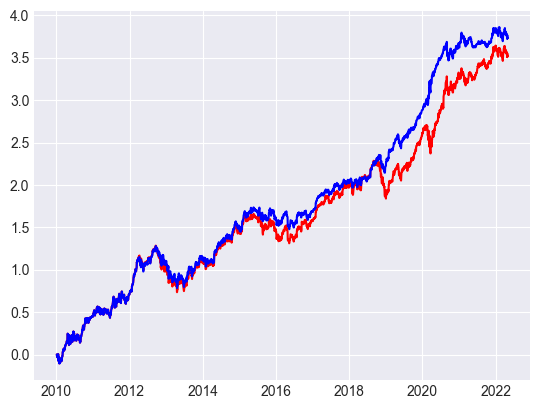

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
